In [1]:
# Import nltk lib and packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

# Import std libs 
import csv
import numpy as np
import pandas as pd
from pandas import read_csv
from emoji import UNICODE_EMOJI
from googletrans import Translator
import time
import pickle
import os
from collections import Counter

# Import vader SWE and stanza for swe lemmatizing
from vaderSentiment_swe.vaderSentiment import SentimentIntensityAnalyzer as swe_sia
import stanza

# Import sklearn packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold, GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, GaussianNB, BernoulliNB

#Import keras packages
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint

# Import for handling warnings
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# Import packages for plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from prettytable import PrettyTable

%matplotlib inline

# Toggle the NLTK downloader
#nltk.download()


In [28]:
# Remove stop words and stem the words (SWÄDISH)

def remove_stop_words_and_lemmatize_words(text): 
    # Tokenize text to single words  
    words = tt.tokenize(text)
    # Remove special chars
    alpha_words = [w for w in words if remove_special_chars(w)]
    # Remove stopwords and create sentence with unlemmatized words
    words_without_stopwords= [word.lower() for word in alpha_words if word not in swe_stop_words]
    unlemmatized_sentence = ' '.join(words_without_stopwords)

    # Initiate document containing lemmatized words
    doc = nlp(unlemmatized_sentence)

    # Lemmatize words and join the words to a string
    lemmatizeds_words = [word.lemma for sentence in doc.sentences for word in sentence.words]

    lemmatized_sentence = ' '.join(lemmatizeds_words)
    #print(lemmatized_sentence)
    return lemmatized_sentence


# Method for checking if word is a special character
def remove_special_chars(w):
    if w in UNICODE_EMOJI['en']:
        return True
    else:
        return w.isalpha()


# Initiate tweet tokenizer, sentiment analyzer and nlp pipeline for lemmatization
tt = TweetTokenizer()
analyzer = swe_sia()
nlp = stanza.Pipeline(lang="sv")

# Create list of stopwords
swe_stop_words=set(stopwords.words("swedish"))

# Read csv file and start processing data
df = pd.read_csv('plejd.csv')
df['preprocessed_text'] = [remove_stop_words_and_lemmatize_words(text) for text in df['tweet_text']]
df['polarity_scores'] = [analyzer.polarity_scores(text) for text in df['preprocessed_text']]
df.to_csv('swe_plejd_data.csv')
print("Done.")


# TESTS
# test = remove_stop_words_and_lemmatize_words("wow vad bra du bajsar charlie")
# print(test)
# print(sia.polarity_scores(test))



2021-05-12 12:05:39 INFO: Loading these models for language: sv (Swedish):
| Processor | Package   |
-------------------------
| tokenize  | talbanken |
| pos       | talbanken |
| lemma     | talbanken |
| depparse  | talbanken |

2021-05-12 12:05:39 INFO: Use device: cpu
2021-05-12 12:05:39 INFO: Loading: tokenize
2021-05-12 12:05:39 INFO: Loading: pos
2021-05-12 12:05:41 INFO: Loading: lemma
2021-05-12 12:05:41 INFO: Loading: depparse
2021-05-12 12:05:44 INFO: Done loading processors!
Done.


In [20]:
# Remove stop words and lemmatize the words (English)

def remove_stop_words_and_lemmatize_words(text): 
    # Tokenize text to single words  
    words = tt.tokenize(text)

    # Remove special chars
    alpha_words = [w for w in words if remove_special_chars(w)]

    # Remove stopwords and create sentence with unlemmatized words
    words_without_stopwords= [word.lower() for word in alpha_words if word not in stop_words]
    
    # Initiate document containing lemmatized words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words_without_stopwords]

    # Lemmatize words and join the words to a string
    lemmatized_sentence = ' '.join(lemmatized_words)

    #print(lemmatized_sentence)
    return lemmatized_sentence


# Method for checking if word is a special character
def remove_special_chars(w):
    if w in UNICODE_EMOJI['en']:
        return True
    else:
        return w.isalpha()

# Start looping from index
index = 805

# Initiate tweet tokenizer, sentiment analyzer and translator
tt = TweetTokenizer()
sia = SentimentIntensityAnalyzer()
lemmatizer = WordNetLemmatizer()
translator = Translator()

# Create list of stopwords
stop_words=set(stopwords.words("english"))

# Read csv file and start processing data
df = pd.read_csv('plejd.csv')
df_to_translate = df.iloc[index:, :]
df_to_translate['english_text'] = [translator.translate(text, src='sv', dest='en').text for text in df_to_translate['tweet_text']]
df_to_translate['preprocessed_text'] = [remove_stop_words_and_lemmatize_words(text) for text in df_to_translate['english_text']]
df_to_translate['polarity_scores'] = [sia.polarity_scores(text) for text in df_to_translate['preprocessed_text']]
df_to_translate.to_csv('eng_plejd_data.csv', mode='a')
print("Done.")


# TESTS
#test = remove_stop_words_and_lemmatize_words("wow nlkt är jättebra")
#print(sia.polarity_scores(test))
#print(stop_words)
# test = "Charlie är en liten kille som gillar att bajsa, han bajsar ofta på sig för att han hoppade och skrattar"
# test2 = translator.translate(test2, src='sv', dest='en').text
# test = remove_stop_words_and_lemmatize_words(test2)
# print(test)


Done.
<ipython-input-20-378ab51e2009>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_translate['english_text'] = [translator.translate(text, src='sv', dest='en').text for text in df_to_translate['tweet_text']]
<ipython-input-20-378ab51e2009>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_translate['preprocessed_text'] = [remove_stop_words_and_lemmatize_words(text) for text in df_to_translate['english_text']]
<ipython-input-20-378ab51e2009>:47: SettingWithCopyWarning: 
A value is trying to 

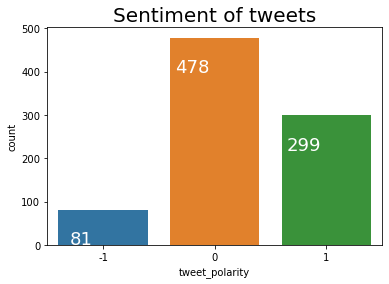

In [10]:
 #Plot how many of each polarity exists
df = pd.read_csv('swe_plejd_data.csv')

# sns.countplot(x='tweet_polarity', data=df)

ax = sns.countplot(x="tweet_polarity", data=df)
ax.set_title('Sentiment of tweets', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [19]:
# Visualize and calc accuracy score on SWE/ENG Lexicon methods in SCI-KIT LEARN

# Create dict from dict string SWE
def swe_string_to_dict(string): 
    # Remove score for each word in debug
    groups = string.split(',')
    polarity_scores_list_strings = ','.join(groups[:4]), ','.join(groups[4:])
    polarity_score = polarity_scores_list_strings[0] + "}"
    return dict((s.strip("{':"), float(v.strip("}"))) for s,v in (score.split() for score in polarity_score.split(",")))

# ENG
def eng_string_to_dict(string): 
    return dict((s.strip("{':"), float(v.strip("}"))) for s,v in (score.split() for score in string.split(",")))


# Start of script
swe_df = pd.read_csv('swe_plejd_data.csv')
eng_df = pd.read_csv('eng_plejd_data.csv')

# Drop potential rows with other targets than -1, 0, 1
swe_df.drop(swe_df[swe_df.tweet_polarity > 1].index, inplace=True)
eng_df.drop(eng_df[eng_df.tweet_polarity > 1].index, inplace=True)

# dfs = [swe_df, eng_df]
data_frames = {'eng': eng_df, 'swe': swe_df}

# Accuracy scores for lexicon ENG/SWE
threshold = + 0.34

# Loop through dfs
for key, df in data_frames.items():
    pred = []
    real = [] 

    # Check if df is swe/eng
    string_to_dict_func = swe_string_to_dict if key == 'swe' else eng_string_to_dict

    for index, tweet in df.iterrows():
        p_scores = string_to_dict_func(tweet['polarity_scores'])
        check = lambda x : 1 if x > threshold else ( -1 if x < -threshold else 0)
        pred.append(check(p_scores['compound']))
        real.append(tweet['tweet_polarity'])

    model_report = classification_report(real, pred)  
    # acc = sum(cv_scores['test_accuracy'])/len(cv_scores['test_accuracy'])
    # print(" CV ACC: ", acc)
    # print(" F1: ", sum(cv_scores['test_f1_macro'])/len(cv_scores['test_f1_macro']))
    # print(" Precision: ", sum(cv_scores['test_precision_macro'])/len(cv_scores['test_precision_macro']))
    # print(" Recall: ", sum(cv_scores['test_recall_macro'])/len(cv_scores['test_recall_macro']))

    print(model_report)
    # Print model results
    # print('Positive: ', model_report['1'])
    # print('Negative: ', model_report['-1'])
    # print('Neutral: ', model_report['0'])
    print(key)
    print('Accuracy: ',accuracy_score(real, pred))
    print("----------------------------------------")
    


              precision    recall  f1-score   support

          -1       0.17      0.11      0.14        80
           0       0.62      0.53      0.57       478
           1       0.43      0.57      0.49       299

    accuracy                           0.50       857
   macro avg       0.41      0.40      0.40       857
weighted avg       0.51      0.50      0.50       857

eng
Accuracy:  0.5040840140023337
----------------------------------------
              precision    recall  f1-score   support

          -1       0.13      0.09      0.10        81
           0       0.57      0.43      0.49       478
           1       0.38      0.56      0.45       299

    accuracy                           0.44       858
   macro avg       0.36      0.36      0.35       858
weighted avg       0.46      0.44      0.44       858

swe
Accuracy:  0.4405594405594406
----------------------------------------


In [41]:
# Grid search

# Initiate DF for swe and eng data
swe_df = pd.read_csv('swe_plejd_data.csv')
eng_df = pd.read_csv('eng_plejd_data.csv')
data_frames = {'ENG': eng_df, 'SWE': swe_df}

# LR pipeline setup
lr_pipe = Pipeline([
 ('lr', LogisticRegression())
])

# SVM pipeline setup
svm_pipe = Pipeline([
 ('svm',  SVC())
])

# Randomforest pipeline setup
rf_pipe = Pipeline([
 ('rf', RandomForestClassifier())
])

# KNN pipeline setup
knn_pipe = Pipeline([
 ('knn', KNeighborsClassifier())
])

# dt pipeline setup
dt_pipe = Pipeline([
 ('dt', DecisionTreeClassifier())
])

# mnb pipeline setup
mnb_pipe = Pipeline([
 ('mnb', MultinomialNB())
])

# cnb pipeline setup
cnb_pipe = Pipeline([
 ('cnb', ComplementNB())
])

# Parameters for classifiers
parameters_LR = {
    'lr__C': (0.001, 0.01, 0.1, 1, 10, 100),
    'lr__penalty': ('none', 'l1', 'l2', 'elasticnet'),
    'lr__solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
}
            
parameters_SVM = {
    'svm__C': (0.001, 0.01, 0.1, 1, 10, 100),
    'svm__gamma': [1, 0.1, 0.001],
    'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
            
parameters_RF = { 
    'rf__max_depth': [1000],
    'rf__max_features': (1,2,3,4,5,6,7,8,9,10),
    'rf__min_samples_split': [100],
    'rf__max_leaf_nodes': [None],
    'rf__n_estimators': (50, 100, 500)
    }

parameters_KNN = {
    'knn__n_neighbors': (1, 3, 5, 7, 9, 11),
    'knn__metric': ('euclidean', 'manhattan', 'minkowski'),
    'knn__weights': ('uniform', 'distance')
    }

parameters_DT = {
    'dt__criterion': ('gini', 'entropy'),
    'dt__max_depth': (2,4,6,8,10,12)
    }

parameters_MNB = {
    'mnb__alpha': (0.01, 0.1, 0.5, 1.0, 10.0)
    }

parameters_CNB = {
    'cnb__alpha': (0.01, 0.1, 0.5, 1.0, 10.0)
    }

tf_vectorizer = TfidfVectorizer(min_df = 1,max_df = 0.5,ngram_range=(1,2))
for key, df in data_frames.items():
    print("\nDataframe: ", key)
    X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'].values.astype('U'), df['tweet_polarity'], stratify=df['tweet_polarity'],random_state=42,test_size=0.3)
    
    # Setting up GridSearch for all alg
    lr_gs = GridSearchCV(lr_pipe, param_grid=parameters_LR, cv = 3, verbose = 1, n_jobs = -1)
    svm_gs = GridSearchCV(svm_pipe, param_grid=parameters_SVM, cv = 3, verbose = 1, n_jobs = -1)
    rf_gs = GridSearchCV(rf_pipe, param_grid=parameters_RF, cv = 3, verbose =1, n_jobs = -1)
    knn_gs = GridSearchCV(knn_pipe, param_grid=parameters_KNN, cv = 3, verbose = 1, n_jobs = -1)
    dt_gs = GridSearchCV(dt_pipe, param_grid=parameters_DT, cv = 3, verbose =1, n_jobs = -1)
    mnb_gs = GridSearchCV(mnb_pipe, param_grid=parameters_MNB, cv = 3, verbose = 1, n_jobs = -1)
    cnb_gs = GridSearchCV(cnb_pipe, param_grid=parameters_CNB, cv = 3, verbose = 1, n_jobs = -1)

    train_vectors = tf_vectorizer.fit_transform(X_train)
    test_vectors = tf_vectorizer.transform(X_test)

    oversample = SMOTE()
    X, y = oversample.fit_resample(train_vectors, y_train)

    # Fitting
    lr_gs.fit(X, y)
    svm_gs.fit(X, y)
    rf_gs.fit(X, y)
    knn_gs.fit(X, y)
    dt_gs.fit(X, y)
    mnb_gs.fit(X, y)
    cnb_gs.fit(X, y)

    # Scoring
    lr_gs.score(test_vectors, y_test)
    print('\nBest Score - LR:', lr_gs.best_score_)
    print('Best params: ', lr_gs.best_params_ ) 

    svm_gs.score(test_vectors, y_test)
    print('\nBest Score - SVM:', svm_gs.best_score_)
    print('Best params: ', svm_gs.best_params_ ) 

    rf_gs.score(test_vectors, y_test)
    print('\nBest Score - RF:', rf_gs.best_score_)
    print('Best params: ', rf_gs.best_params_ ) 

    knn_gs.score(test_vectors, y_test)
    print('\nBest Score - KNN:', knn_gs.best_score_)
    print('Best params: ', knn_gs.best_params_ ) 

    dt_gs.score(test_vectors, y_test)
    print('\nBest Score - DT:', dt_gs.best_score_)
    print('Best params: ', dt_gs.best_params_ ) 

    mnb_gs.score(test_vectors, y_test)
    print('\nBest Score - MNB:', mnb_gs.best_score_)
    print('Best params: ', mnb_gs.best_params_ ) 

    #svm_gs.score(X_train, y_train)
    cnb_gs.score(test_vectors, y_test)
    print('\nBest Score - CNB:', cnb_gs.best_score_)
    print('Best params: ', cnb_gs.best_params_ ) 

   


Dataframe:  ENG
Fitting 3 folds for each of 120 candidates, totalling 360 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best Score - LR: 0.8922155688622754
Best params:  {'lr__C': 100, 'lr__penalty': 'l1', 'lr__solver': 'saga'}

Best Score - SVM: 0.8992015968063872
Best params:  {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}

Best Score - RF: 0.87125748502994
Best params:  {'rf__max_depth': 1000, 'rf__max_features': 5, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'rf__n_estimators': 50}

Best Score - KNN: 0.8532934131736526
Best params:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

Best Score - DT: 0.63572854


Dataframe:  ENG
Training time: 0.169977s; Prediction time: 7.920202s
 ACC:  0.8952686567164179
 F1:  0.894895531508233
 Precision:  0.8995314066852742
 Recall:  0.8953263983114729

Accuracy of LogisticRegression is 0.7131782945736435
              precision    recall  f1-score   support

          -1       0.70      0.29      0.41        24
           0       0.76      0.81      0.79       144
           1       0.64      0.67      0.65        90

    accuracy                           0.71       258
   macro avg       0.70      0.59      0.62       258
weighted avg       0.71      0.71      0.70       258

-----------------------
Training time: 59.025564s; Prediction time: 4.712581s
 ACC:  0.9092537313432836
 F1:  0.9088708710913878
 Precision:  0.9229790298876914
 Recall:  0.9093170511080958

Accuracy of RandomForestClassifier is 0.7015503875968992
              precision    recall  f1-score   support

          -1       1.00      0.25      0.40        24
           0       0.69    

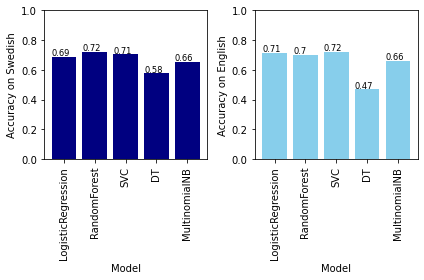

In [9]:
# Visualize and calc accuracy score on SWE/ENG ML in SCI-KIT LEARN
# Initiate DF for swe and eng data
swe_df = pd.read_csv('swe_plejd_data.csv')
eng_df = pd.read_csv('eng_plejd_data.csv')
data_frames = {'ENG': eng_df, 'SWE': swe_df}

# Start of script, initiate TFIDFVectroizer
tf_vectorizer = TfidfVectorizer(min_df = 1,max_df = 0.5,ngram_range=(1,2))

Classifiers = [
    LogisticRegression(C=100,solver='saga', penalty='l1', max_iter=200), 
    RandomForestClassifier(n_estimators=500),
    SVC(kernel = 'rbf', C=10, gamma=0.1),
    DecisionTreeClassifier(criterion='entropy', max_depth=12),
    MultinomialNB(alpha=0.01)]

Classifier_names = [
'LogisticRegression',
'RandomForest',
'SVC',
'DT',
'MultinomialNB'
]

swe_accuracy=[]
eng_accuracy=[]
Model=[]

# Accuracy scores for ML ENG/SWE
for key, df in data_frames.items():
    print("\nDataframe: ", key)
    # split data for training / test
    X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'].values.astype('U'), df['tweet_polarity'],stratify=df['tweet_polarity'],  test_size=0.3)
    # Measure training time
    time0 = time.time()

    # Fit all models
    for classifier in Classifiers:

        # Fit train/test for TF-IDF
        tfidf_train_vectors = tf_vectorizer.fit_transform(X_train)
        tfidf_test_vectors = tf_vectorizer.transform(X_test)

        oversample = SMOTE()
        tf_X, tf_y = oversample.fit_resample(tfidf_train_vectors, y_train)

        # Measure pred time
        time1 = time.time()

        # Fit & Predict
        clf_fit = classifier.fit(tf_X, tf_y)
        clf_pred = clf_fit.predict(tfidf_test_vectors)

        #Calculate train and pred times 
        time2 = time.time()
        time_train = time1-time0
        time_predict = time2-time1
        print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))

        # print time and results
        model_report = classification_report(y_test, clf_pred)  
        cv_scores = cross_validate(classifier, tf_X, tf_y, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],cv=5)

        acc = sum(cv_scores['test_accuracy'])/len(cv_scores['test_accuracy'])
        print(" ACC: ", acc)
        print(" F1: ", sum(cv_scores['test_f1_macro'])/len(cv_scores['test_f1_macro']))
        print(" Precision: ", sum(cv_scores['test_precision_macro'])/len(cv_scores['test_precision_macro']))
        print(" Recall: ", sum(cv_scores['test_recall_macro'])/len(cv_scores['test_recall_macro']))

        # #Print and save accuracy
        acc = accuracy_score(clf_pred, y_test)
        swe_accuracy.append(acc) if key == 'SWE' else eng_accuracy.append(acc)
        #Accuracy.append(acc)
        print('\nAccuracy of '+classifier.__class__.__name__+' is '+str(acc)) 

        # Print model results
        print(model_report)
        print("-----------------------")  

    
#Print models result on DF
print(swe_accuracy)
print(eng_accuracy)
Index = [1,2,3,4,5]

plt.subplot(1, 2, 1)
plt.bar(Index,swe_accuracy, color='navy')
plt.xticks(Index, Classifier_names, rotation=90)
plt.ylabel('Accuracy on Swedish')
plt.ylim(0, 1)
plt.xlabel('Model')
for i, v in enumerate(swe_accuracy):
    plt.text(Index[i] - 0.4, v + 0.01, str(round(v, 2)), fontsize='small')

# Draw second subplot using plt.subplot
plt.subplot(1, 2, 2)
plt.bar(Index,eng_accuracy, color = 'skyblue')
plt.xticks(Index, Classifier_names, rotation=90)
plt.ylabel('Accuracy on English')
plt.ylim(0, 1)
plt.xlabel('Model')
for i, v in enumerate(eng_accuracy):
    plt.text(Index[i] - 0.4, v + 0.01, str(round(v, 2)), fontsize='small')
plt.tight_layout()
plt.show()
    

Class=0, n=334 (33.333%)
Class=1, n=209 (20.858%)
Class=-1, n=57 (5.689%)
-------
Class=1, n=334 (33.333%)
Class=2, n=334 (33.333%)
Class=0, n=334 (33.333%)


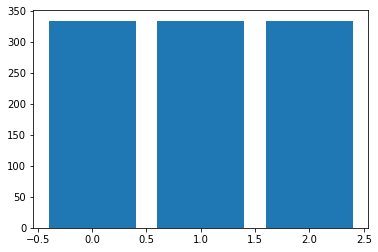

In [25]:
	
# example of oversampling a multi-class classification dataset
df = pd.read_csv('swe_plejd_data.csv')

vectorizer = TfidfVectorizer(min_df = 0.0,max_df = 1.0,sublinear_tf = True,use_idf = True)

X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'].values.astype('U'), df['tweet_polarity'], stratify=df['tweet_polarity'], test_size=0.3)

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)  

counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

print("-------")
y = LabelEncoder().fit_transform(y_train)
oversample = SMOTE()
X, y = oversample.fit_resample(train_vectors, y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

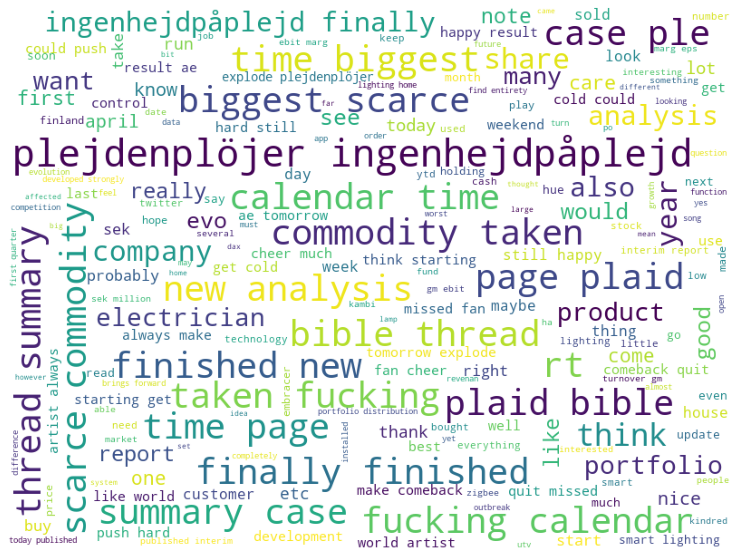

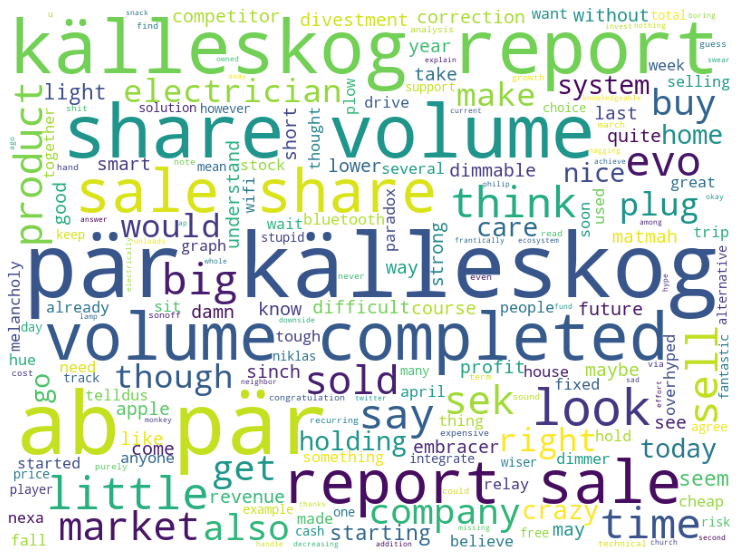

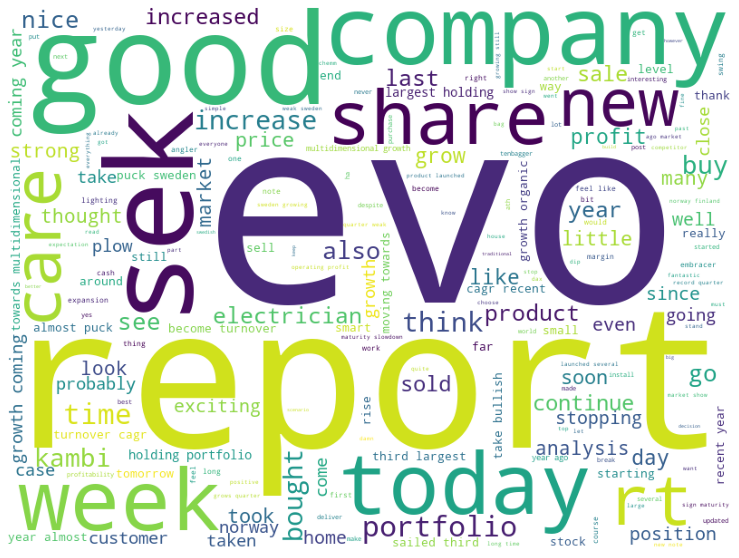

In [8]:
# Visualize frequent word

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = eng_stop_words, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


eng_stop_words=['plejd', 'Plejd'] + list(stopwords.words("english"))
eng_df = pd.read_csv('eng_plejd_data.csv')
neutrals = eng_df[eng_df['tweet_polarity'] == 0]
negatives = eng_df[eng_df['tweet_polarity'] == -1]
positives = eng_df[eng_df['tweet_polarity'] == 1]

cloud(' '.join(neutrals['preprocessed_text'].values.astype('U')))
cloud(' '.join(negatives['preprocessed_text'].values.astype('U')))
cloud(' '.join(positives['preprocessed_text'].values.astype('U')))

In [21]:
def __dict_help(scores_dict):
	scores_dict = {metric: round(np.mean(scores), 5) for metric, scores in scores_dict.items()}
	
	del scores_dict['fit_time']
	del scores_dict['score_time']

	for item in scores_dict:
		print(f'{item}: {scores_dict[item]}')


df = pd.read_csv('plejd_prep.csv')

df = df.drop(['tweet_created_at'], axis=1)
#df = df.drop(['Quantity'], axis=1)
df = df.drop(['Volume'], axis=1)

y = df['target']
X = df.drop(['target'], axis = 1)

Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200), 
    RandomForestClassifier(n_estimators=500),
    GradientBoostingClassifier(n_estimators=20,learning_rate=0.75,max_features=2,max_depth=3,random_state=0),
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    KNeighborsClassifier(n_neighbors = 3),
    DecisionTreeClassifier(),
    AdaBoostClassifier(n_estimators=100)]


for classifier in Classifiers:
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
    clf_fit = classifier.fit(X.iloc[train_index], y.iloc[train_index])
    clf_pred = clf_fit.predict(X.iloc[test_index])

    scoring = {'accuracy': 'accuracy',
        'recall -1': make_scorer(recall_score, average='micro', labels = [-1]), 
        'recall 0': make_scorer(recall_score, average='micro', labels = [0]),
        'recall 1': make_scorer(recall_score, average='micro', labels = [1]),
        'precision -1': make_scorer(precision_score, average='micro', labels = [-1]), 
        'precision 0': make_scorer(precision_score, average='micro', labels = [0]),
        'precision 1': make_scorer(precision_score, average='micro', labels = [1]),
        'f1-score -1': make_scorer(f1_score, average='micro', labels = [-1]), 
        'f1-score 0': make_scorer(f1_score, average='micro', labels = [0]),
        'f1-score 1': make_scorer(f1_score, average='micro', labels = [1])}
    
    print('\n'+classifier.__class__.__name__) 
    scores_dict = __dict_help(cross_validate(classifier, X, y, cv=tscv, scoring=scoring))
		



TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10 11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12 13 14 15]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [16 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20 21 22 23]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] TEST: [24 25 26 27]

LogisticRegression
test_accuracy: 0.6
test_recall -1: 0.2
test_recall 0: 0.0
test_recall 1: 0.8
test_precision -1: 0.1
test_precision 0: 0.0
test_precision 1: 0.5
test_f1-score -1: 0.13333
test_f1-score 0: 0.0
test_f1-score 1: 0.59429
TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10 11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12 13 14 15]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [16 17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 

ZeroDivisionError: Weights sum to zero, can't be normalized

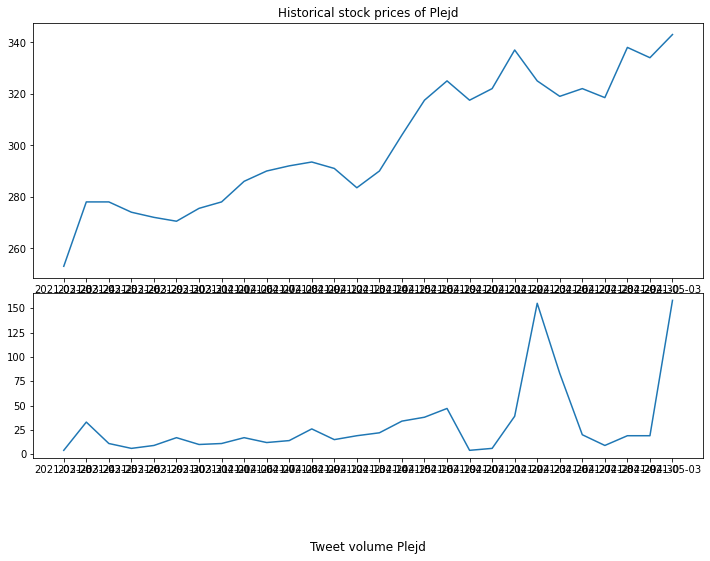

In [63]:
df = pd.read_csv('Plejd_stock_tweets_prepared2.csv')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(df['tweet_created_at'], df["Close"])
plt.title('Historical stock prices of Plejd')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=3, colspan=4)
bottom_plt.plot(df['tweet_created_at'], df['Count_tweets'])
plt.title('\nTweet volume Plejd', y=-0.60)
plt.gcf().set_size_inches(12,8)

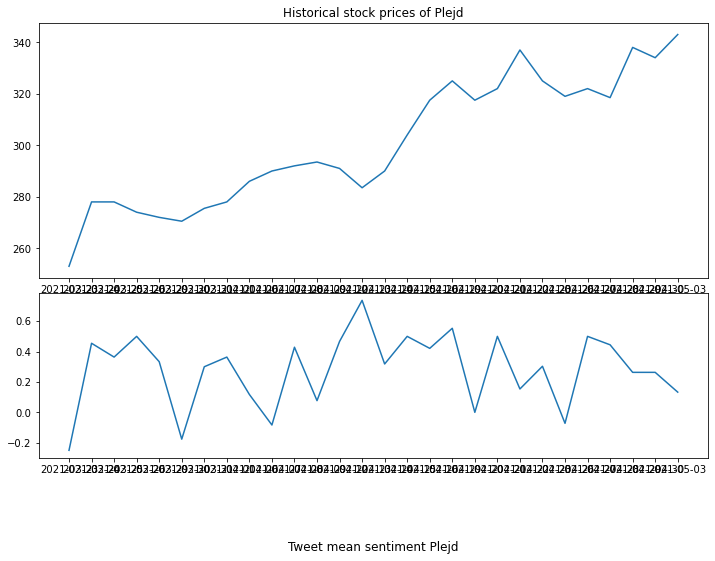

In [62]:
df = pd.read_csv('Plejd_stock_tweets_prepared2.csv')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(df['tweet_created_at'], df["Close"])
plt.title('Historical stock prices of Plejd')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=3, colspan=4)
bottom_plt.plot(df['tweet_created_at'], df['Mean_polarity'])
plt.title('\nTweet mean sentiment Plejd', y=-0.60)
plt.gcf().set_size_inches(12,8)

In [20]:
df = pd.read_csv('plejd_prep.csv')

df = df.drop(['tweet_created_at'], axis=1)
# df = df.drop(['Quantity'], axis=1)
df = df.drop(['Volume'], axis=1)

y = df['target']
X = df.drop(['target'], axis = 1)
df.corr()

,mean_polarity,tweet_volume,Quantity,close,target
mean_polarity,1.000000,-0.075464,-0.007343,0.166573,-0.173208
tweet_volume,-0.075464,1.000000,0.738970,0.009413,-0.325343
Quantity,-0.007343,0.738970,1.000000,-0.139897,-0.298668
close,0.166573,0.009413,-0.139897,1.000000,-0.034200
target,-0.173208,-0.325343,-0.298668,-0.034200,1.000000


In [55]:
df = pd.read_csv('test_data.csv')

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(df['preprocessed_text'].values.astype('U'))
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(30))

df1 = pd.DataFrame(tfIdf[1].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df1 = df1.sort_values('TF-IDF', ascending=False)
print (df1.head(30))

# vect = TfidfVectorizer()
# tfidf_matrix = vect.fit_transform(df['preprocessed_text'].values.astype('U'))
# df = pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
# print(df)


               TF-IDF
avyttrat     0.288375
svår         0.288375
fin          0.288375
flera        0.288375
vi           0.288375
häst         0.288375
tillsammans  0.288375
beslut       0.288375
resa         0.288375
ta           0.288375
ha           0.205181
idag         0.205181
innehav      0.205181
plejd        0.205181
vara         0.000000
tidig        0.000000
kännas       0.000000
stor         0.000000
segla        0.000000
klarhet      0.000000
in           0.000000
gå           0.000000
företag      0.000000
öka          0.000000
               TF-IDF
klarhet      0.515968
kännas       0.257984
in           0.257984
vara         0.257984
tidig        0.257984
stor         0.257984
segla        0.257984
öka          0.257984
gå           0.257984
företag      0.257984
idag         0.183558
innehav      0.183558
ha           0.183558
plejd        0.183558
häst         0.000000
beslut       0.000000
resa         0.000000
svår         0.000000
ta           0.000000
flera     

In [43]:
def remove_stop_words_and_lemmatize_words(text): 
    # Tokenize text to single words  
    words = tt.tokenize(text)
    # Remove special chars
    alpha_words = [w for w in words if remove_special_chars(w)]
    # Remove stopwords and create sentence with unlemmatized words
    words_without_stopwords= [word.lower() for word in alpha_words if word not in swe_stop_words]
    unlemmatized_sentence = ' '.join(words_without_stopwords)

    # Initiate document containing lemmatized words
    doc = nlp(unlemmatized_sentence)

    # Lemmatize words and join the words to a string
    lemmatizeds_words = [word.lemma for sentence in doc.sentences for word in sentence.words]

    lemmatized_sentence = ' '.join(lemmatizeds_words)
    #print(lemmatized_sentence)
    return lemmatized_sentence


# Method for checking if word is a special character
def remove_special_chars(w):
    if w in UNICODE_EMOJI['en']:
        return True
    else:
        return w.isalpha()


# Initiate tweet tokenizer, sentiment analyzer and nlp pipeline for lemmatization
tt = TweetTokenizer()
analyzer = swe_sia()
nlp = stanza.Pipeline(lang="sv")

# Create list of stopwords
swe_stop_words=set(stopwords.words("swedish"))

# Read csv file and start processing data
df = pd.read_csv('test.csv')
df['preprocessed_text'] = [remove_stop_words_and_lemmatize_words(text) for text in df['tweet_text']]
df['polarity_scores'] = [analyzer.polarity_scores(text) for text in df['preprocessed_text']]
df.to_csv('test_data.csv')
print("Done.")


2021-05-13 09:27:45 INFO: Loading these models for language: sv (Swedish):
| Processor | Package   |
-------------------------
| tokenize  | talbanken |
| pos       | talbanken |
| lemma     | talbanken |
| depparse  | talbanken |

2021-05-13 09:27:45 INFO: Use device: cpu
2021-05-13 09:27:45 INFO: Loading: tokenize
2021-05-13 09:27:45 INFO: Loading: pos
2021-05-13 09:27:46 INFO: Loading: lemma
2021-05-13 09:27:46 INFO: Loading: depparse
2021-05-13 09:27:48 INFO: Done loading processors!
Done.
